In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Problem:
*****
The problem is to identify the  signal  from the background, where the signal corresponds to a Higgs boson decaying to a pair of bottom quarks according to the process: $gg \rightarrow H^0 \rightarrow W^{\mp} H^{\pm} \rightarrow W^{\mp} W^{\pm} h^0 \rightarrow W^{\mp} W^{\pm} b \bar{b}$. 



# 2. Datos
*****

- The dataset is available [here](https://www.openml.org/d/23512 ). 

- Check *Baldi, P., P. Sadowski, and D. Whiteson. Searching for Exotic Particles in High-energy Physics with Deep Learning. Nature Communications 5 (July 2, 2014)* y está en este [link](https://www.nature.com/articles/ncomms5308).
-
Each event is represented by a set of 28 features, including 21 low-level features corresponding to physics properties measured by the detector, and 7 high-level features derived from the previous ones.


## 2.1 Loading CSV file

In [2]:
df = pd.read_csv("../../../data/higgs.csv")


/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Removing last row of the file, because is wrong

In [3]:
df.drop(df.tail(1).index,inplace=True) # drop last n rows
df = df.apply(pd.to_numeric)


In [4]:
df.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


### Features that represent the event
-----

In [5]:
df.columns

Index(['class', 'lepton_pT', 'lepton_eta', 'lepton_phi',
       'missing_energy_magnitude', 'missing_energy_phi', 'jet1pt', 'jet1eta',
       'jet1phi', 'jet1b-tag', 'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag',
       'jet3pt', 'jet3eta', 'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta',
       'jet4phi', 'jet4b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb',
       'm_wbb', 'm_wwbb'],
      dtype='object')

In [6]:
df.describe()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,...,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000
mean,0.528572,0.990322,-0.003962,-0.001026,0.995363,-0.007895,0.987064,-0.003198,-0.000141,0.998506,...,-0.006840,-0.004252,0.992748,1.032689,1.023186,1.050129,1.010358,0.973207,1.032052,0.959432
std,0.499185,0.561796,1.004881,1.006120,0.595350,1.006840,0.473272,1.008452,1.008640,1.027324,...,1.008868,1.007205,1.396809,0.653127,0.372136,0.164565,0.398042,0.522968,0.363590,0.313487
min,0.000000,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.139976,-2.968735,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.110875,0.303144,0.133012,0.295983,0.048125,0.303350,0.350939
25%,0.000000,0.590936,-0.741244,-0.867492,0.575677,-0.881764,0.676336,-0.689225,-0.868096,0.000000,...,-0.724184,-0.877583,0.000000,0.791368,0.846572,0.985771,0.767491,0.674055,0.819441,0.770026
50%,1.000000,0.854835,-0.002976,0.002081,0.890817,-0.011585,0.892163,-0.001016,-0.004931,1.086538,...,-0.009622,-0.010253,0.000000,0.895673,0.950702,0.989737,0.917320,0.874083,0.947187,0.871170
75%,1.000000,1.236592,0.734318,0.868220,1.291563,0.865105,1.167534,0.683233,0.871085,2.173076,...,0.711603,0.869386,3.101961,1.026068,1.083365,1.020822,1.141703,1.140051,1.139135,1.057654
max,1.000000,7.805887,2.433894,1.743236,7.998711,1.743229,7.064657,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.428827,10.038273,4.565248,7.442589,11.994177,7.318191,6.015647


In [7]:
df["class"].value_counts()

1    51826
0    46223
Name: class, dtype: int64

## 3. Using RandomForest
-----

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
y = df["class"]
X = df.iloc[:,1:]

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y, test_size=0.2, random_state=0)

In [11]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred_prob = clf.predict_proba(X_test)

y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


fpr, tpr, ths = roc_curve(y_test,  y_pred)
auc_ = auc(fpr, tpr)
f1 = f1_score(y_test,  (y_pred>.5))
prec = precision_score(y_test,  (y_pred>.5))
rec = recall_score(y_test,  (y_pred>.5))
acc = accuracy_score(y_test,  (y_pred>.5))
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)


F1: 0.74  -- prec: 0.73  -- recall: 0.74  -- acc: 0.72


[[6430 2852]
 [2653 7675]]


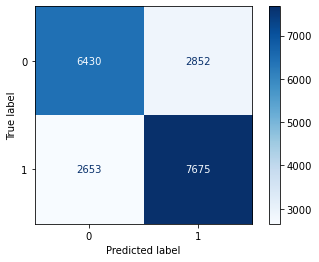

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()  

- Precicion:
$$Prec = \frac{TP}{TP + FP}$$

In [15]:
precision_score(y_test,y_pred)

0.7290776099553529

- Recall:
$$Rec = \frac{TP}{TP + FN}$$

In [16]:
recall_score(y_test, y_pred)

0.7431254841208366

- F1 score: 
$$F1 = 2\frac{prec\, rec}{prec + rec}$$

In [17]:
f1_score(y_test, y_pred)

0.7360345240949413

- Accuracy:
$$Acc = \frac{TP + TN}{TP + TN +FP +FN}$$

In [18]:
accuracy_score(y_test, y_pred)

0.7192758796532381

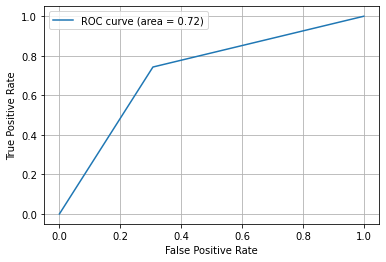

In [19]:
plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [20]:
d = classification_report(y_test, y_pred,output_dict=True)

In [21]:
pd.DataFrame.from_dict(d)

,0,1,accuracy,macro avg,weighted avg
precision,0.707916,0.729078,0.719276,0.718497,0.719061
recall,0.692739,0.743125,0.719276,0.717932,0.719276
f1-score,0.700245,0.736035,0.719276,0.718140,0.719094
support,9282.000000,10328.000000,0.719276,19610.000000,19610.000000


## ¿Is a good classification?
- Let's see the plot of the distribution of  scores

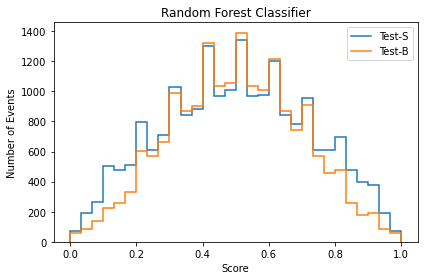

In [22]:
import mplhep as hep
# Score distribution
f, axs = plt.subplots(1, 1, sharex=True, sharey=True)
h_sig_test, bins_sig_test = np.histogram(y_pred_prob[y_test == 1], bins=30)
h_back_test, bins_back_test = np.histogram(y_pred_prob[y_test == 0], bins=30)
axs.set_title("Random Forest Classifier")
hep.histplot([h_sig_test, h_back_test], bins_sig_test, ax=axs,label=["Test-S", "Test-B"])
axs.legend()
axs.set_xlabel("Score")
axs.set_ylabel("Number of Events")
plt.tight_layout()
plt.show()

- We can observe the Random Forest is not able to separate signal from background
- ¿How can we improve the Random Forest performance?


In [23]:
# https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [25]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [26]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': False}  



In [27]:
y_pred_g = rf_random.best_estimator_.predict(X_test)

y_pred_prob_g = rf_random.best_estimator_.predict_proba(X_test)



In [28]:
fpr, tpr, ths = roc_curve(y_test,  y_pred_g)
auc_ = auc(fpr, tpr)
f1 = f1_score(y_test,  (y_pred_g>.5))
prec = precision_score(y_test,  (y_pred_g>.5))
rec = recall_score(y_test,  (y_pred_g>.5))
acc = accuracy_score(y_test,  (y_pred_g>.5))
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)



F1: 0.74  -- prec: 0.73  -- recall: 0.75  -- acc: 0.72


[[6357 2925]
 [2597 7731]]


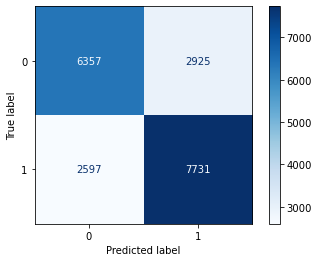

In [31]:
cm = confusion_matrix(y_test, y_pred_g)
print(cm)
plot_confusion_matrix(rf_random.best_estimator_, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()  

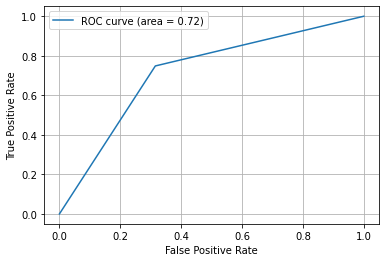

In [32]:
plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [33]:
d = classification_report(y_test, y_pred_g,output_dict=True)

In [34]:
pd.DataFrame.from_dict(d)

,0,1,accuracy,macro avg,weighted avg
precision,0.709962,0.725507,0.718409,0.717734,0.718149
recall,0.684874,0.748548,0.718409,0.716711,0.718409
f1-score,0.697192,0.736847,0.718409,0.717020,0.718077
support,9282.000000,10328.000000,0.718409,19610.000000,19610.000000


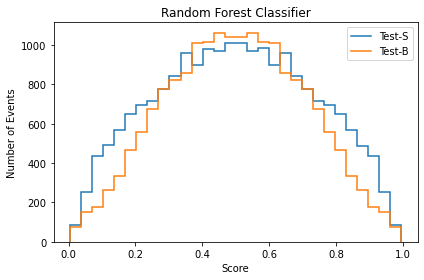

In [35]:
import mplhep as hep
# Score distribution
f, axs = plt.subplots(1, 1, sharex=True, sharey=True)
h_sig_test, bins_sig_test = np.histogram(y_pred_prob_g[y_test == 1], bins=30)
h_back_test, bins_back_test = np.histogram(y_pred_prob_g[y_test == 0], bins=30)
axs.set_title("Random Forest Classifier")
hep.histplot([h_sig_test, h_back_test], bins_sig_test, ax=axs,label=["Test-S", "Test-B"])
axs.legend()
axs.set_xlabel("Score")
axs.set_ylabel("Number of Events")
plt.tight_layout()
plt.show()